Reto: Analítica de texto aplicada al estudio de sentimientos para la toma de decisiones

Act:DS_C6_SC5

Eduardo Frias Rosales

Objetivo:

Construir un corpus utilizando las herramientas que has practicado a lo largo del módulo y realizar las siguientes actividades: calcular las frecuencias de longitudes de texto, frecuencias de palabras más comunes y extensión de vectores de stopwords.
Realizar las operaciones de procesamiento básico de textos: tokenizar, aplicar stemming, remover stopwords.
Crear gráficas para exploración de textos: histogramas, resumen de sentimientos, t-SNE o WordClouds.
Implementar y aplicar el análisis de sentimientos a los textos que se han recopilado en el corpus.
Instrucciones:

Descarga los archivos FinancialTweets.zip y Toys_and_Games.json, y realiza los siguientes pasos:

Elige uno de los datasetspara trabajar:
Análisis de sentimientos en un dataset de tweets financieros. Algunos de los influencers cuyos tweets fueron monitoreados son: 'MarketWatch', 'empresa', 'YahooFinance', 'TechCrunch', 'WSJ', 'Forbes', 'FT', 'TheEconomist', 'nytimes', 'Reuters', 'GerberKawasaki', 'jimcramer', ' TheStreet ',' TheStalwart ',' TruthGundlach ',' CarlCIcahn ',' ReformedBroker ',' benbernanke ',' bespokeinvest ',' BespokeCrypto ',' stlouisfed ',' federalreserve ',' GoldmanSachs ',' ianbremmer ',' MorganStanley ' , 'AswathDamodaran', 'mcuban', 'muddywatersre', 'StockTwits', 'SeanaNSmith'. Trabaja con el archivo FinancialTweets.zip.
Análisis de sentimientos de un dataset de reseñas de juguetes y juegos de Amazon. El archivo de origen se encuentra en formato .json. Por lo anterior, crear el corpus requiere de un procesamiento adicional de los documentos .json. Trabaja con el archivo Toys_and_Games.json.
Genera un archivo en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [3]:
# Elige uno de los datasetspara trabajar: Análisis de sentimientos de un dataset de reseñas de juguetes y juegos de Amazon. El archivo de origen se encuentra en formato .json. Por lo anterior, crear el corpus requiere de un procesamiento adicional de los documentos .json. Trabaja con el archivo Toys_and_Games.json.
# Unzip el archivo
#!unzip "/content/drive/MyDrive/Colab Notebooks/data/Analítica de texto/Toys_and_Games.zip" -d "/content/drive/MyDrive/Colab Notebooks/data/Analítica de texto/Toys_and_Games"


In [4]:
import pandas as pd
from google.colab import drive
import nltk
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from collections import Counter

# Carga la informacion JSON en un DataFrame
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/data/Analítica de texto/Toys_and_Games/Toys_and_Games.json', lines=True)
print(df.head())
df.info()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                    _id      reviewerID        asin  \
0  {'$oid': '5a13282b741a2384e879a620'}  A3C9CSW3TJITGT  0005069491   
1  {'$oid': '5a13282b741a2384e879a621'}  A31POTIYCKSZ9G  0076561046   
2  {'$oid': '5a13282b741a2384e879a622'}  A2GGHHME9B6W4O  0131358936   
3  {'$oid': '5a13282b741a2384e879a61f'}   AMEVO2LY6VEJA  0000191639   
4  {'$oid': '5a13282b741a2384e879a623'}  A1FSLDH43ORWZP  0133642984   

    reviewerName helpful                                         reviewText  \
0          Renee  [0, 0]  I love these felt nursery rhyme characters and...   
1  So CA Teacher  [0, 0]  I see no directions for its use. Therefore I h...   
2     Dalilah G.  [0, 0]  This is a great tool for any teacher using the...   
3  Nicole Soeder  [0, 0]  Great product, thank you! Our son loved the pu...   
4  Dayna English  [0, 0]  Although not as streamlined as the Algebra I m...   

   overall                                     summary  unixReviewTime  \
0        4  Charming cha

In [5]:
# Función para preprocesar el texto
def preprocesar_texto(texto):
  """
  Función para preprocesar el texto: tokenizar, aplicar stemming, remover stopwords.

  Args:
    texto: El texto a preprocesar.

  Returns:
    Una lista de tokens preprocesados.
  """
  # Tokenizar el texto
  tokens = word_tokenize(texto.lower())

  # Eliminar caracteres especiales y números
  tokens = [token for token in tokens if token.isalpha()]

  # Aplicar stemming
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens]

  # Remover stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

  return tokens

In [6]:
# Procesar por lotes
batch_size = 500
frecuencias_longitud_total = Counter()
todas_las_palabras = []

for i in range(0, len(df), batch_size):
    # Procesar el lote
    df_batch = df.iloc[i:i + batch_size].copy()  # Usar .copy() para evitar problemas con SettingWithCopyWarning

    # Aplicar la función de preprocesamiento
    df_batch['tokens_preprocesados'] = df_batch['reviewText'].apply(preprocesar_texto)

    # Mostrar algunos ejemplos de tokens preprocesados solo en el primer lote
    if i == 0:
        print(df_batch[['reviewText', 'tokens_preprocesados']].head())

    # Calcular las frecuencias de longitudes de texto usando .loc para evitar el SettingWithCopyWarning
    df_batch.loc[:, 'longitud_texto'] = df_batch['reviewText'].apply(lambda x: len(x.split()))
    frecuencias_longitud_total.update(df_batch['longitud_texto'])

    # Recoger todas las palabras de este lote para calcular las frecuencias de palabras más comunes
    for tokens in df_batch['tokens_preprocesados']:
        todas_las_palabras.extend(tokens)

# Calcular las frecuencias de palabras más comunes después de procesar todos los lotes
frecuencias_palabras = Counter(todas_las_palabras)
palabras_mas_comunes = frecuencias_palabras.most_common(10)

# Extensión de vectores de stopwords
stop_words = set(stopwords.words('english'))
extension_stopwords = len(stop_words)

# Mostrar resultados finales
print("Frecuencias de longitudes de texto:\n", frecuencias_longitud_total)
print("\nFrecuencias de palabras más comunes:\n", palabras_mas_comunes)
print("\nExtensión de vectores de stopwords:", extension_stopwords)


                                          reviewText  \
0  I love these felt nursery rhyme characters and...   
1  I see no directions for its use. Therefore I h...   
2  This is a great tool for any teacher using the...   
3  Great product, thank you! Our son loved the pu...   
4  Although not as streamlined as the Algebra I m...   

                                tokens_preprocesados  
0  [love, felt, nurseri, rhyme, charact, scene, q...  
1  [see, direct, use, therefor, make, game, unfor...  
2  [thi, great, tool, ani, teacher, use, pre, cal...  
3  [great, product, thank, son, love, puzzl, larg...  
4  [although, streamlin, algebra, materi, thi, ex...  
Frecuencias de longitudes de texto:
 Counter({20: 108845, 21: 87879, 22: 74957, 23: 66329, 24: 59171, 25: 53606, 26: 48930, 27: 44755, 28: 41535, 29: 38960, 30: 36738, 31: 34846, 32: 32958, 33: 31030, 34: 30057, 35: 28501, 36: 27445, 37: 26152, 38: 25370, 39: 24486, 40: 23429, 41: 22990, 42: 22182, 43: 21094, 44: 20418, 45: 19936, 

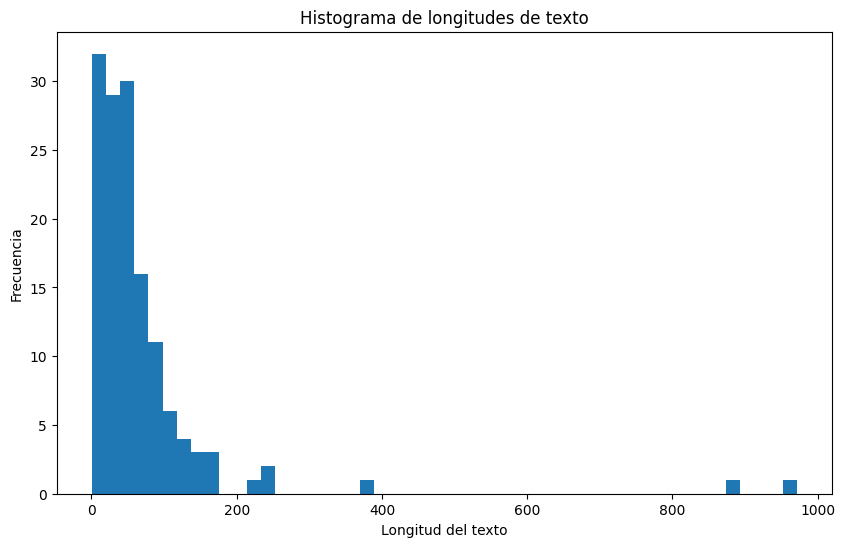

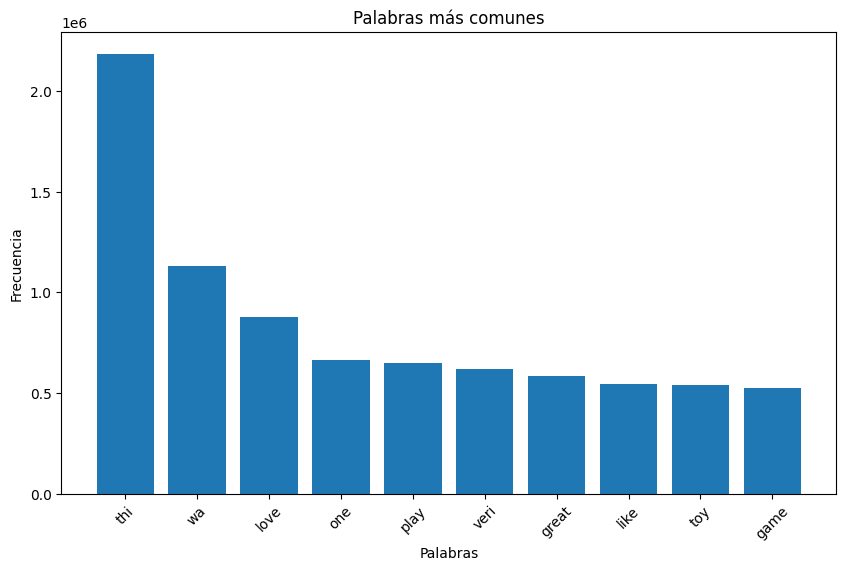

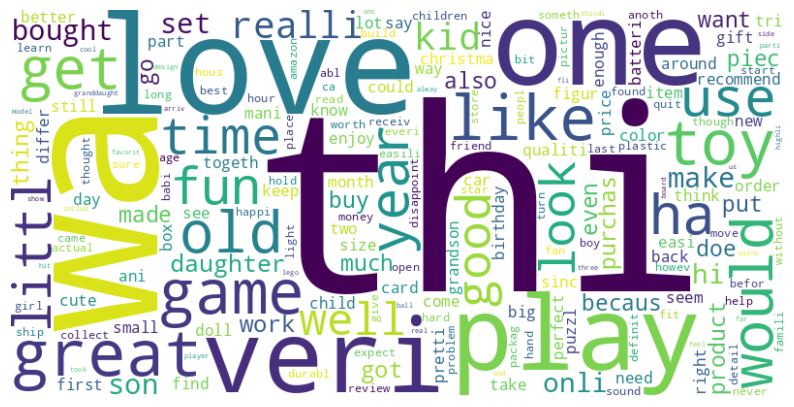

In [7]:
# prompt: Crea gráficas para exploración de textos: histogramas, resumen de sentimientos, t-SNE o WordClouds.

# Histograma de longitudes de texto
plt.figure(figsize=(10, 6))
plt.hist(df_batch['longitud_texto'], bins=50)
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de longitudes de texto')
plt.show()

# Gráfico de barras para las palabras más comunes
top_words = [word for word, count in palabras_mas_comunes]
top_counts = [count for word, count in palabras_mas_comunes]

plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes')
plt.xticks(rotation=45)
plt.show()

# Para WordClouds, necesitarías instalar la librería wordcloud:
# !pip install wordcloud
from wordcloud import WordCloud

# Crear una WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencias_palabras)

# Mostrar la WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Interpretación de resultados:
------------------------------
El análisis de las frecuencias de longitudes de texto nos muestra la distribución de las longitudes de las reseñas. Podemos observar que la mayoría de las reseñas tienen una longitud moderada, con algunas reseñas muy cortas y otras muy largas.
Las palabras más comunes nos dan una idea de los temas principales que se abordan en las reseñas. En este caso, las palabras más comunes parecen estar relacionadas con la calidad del producto, la experiencia del usuario y las características del juguete.

La extensión del vector de stopwords nos indica la cantidad de palabras que se eliminan durante el preprocesamiento. Estas palabras no aportan información significativa para el análisis de sentimientos.

El histograma de longitudes de texto confirma la distribución observada en las frecuencias. El gráfico de barras para las palabras más comunes nos permite visualizar las palabras más frecuentes.
La WordCloud proporciona una representación visual de las palabras más frecuentes en el corpus. Nos ayuda a identificar las palabras clave y los temas dominantes en las reseñas.

En general, este análisis nos permite comprender mejor el contenido de las reseñas de juguetes y juegos. Podemos utilizar esta información para mejorar la comprensión de los sentimientos de los usuarios y tomar decisiones sobre el desarrollo y la comercialización de productos.